<a href="https://colab.research.google.com/github/ntlgiang/Capstone-Projects/blob/master/Lending_Club_Loan_Data_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Lending Club Loan Data Analysis**

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.models import load_model
from sklearn.metrics import confusion_matrix, classification_report
from pickle import dump, load

%matplotlib inline

In [3]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Dataset/Lending Club Loan Data Analysis/loan_data.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   credit.policy      9578 non-null   int64  
 1   purpose            9578 non-null   object 
 2   int.rate           9578 non-null   float64
 3   installment        9578 non-null   float64
 4   log.annual.inc     9578 non-null   float64
 5   dti                9578 non-null   float64
 6   fico               9578 non-null   int64  
 7   days.with.cr.line  9578 non-null   float64
 8   revol.bal          9578 non-null   int64  
 9   revol.util         9578 non-null   float64
 10  inq.last.6mths     9578 non-null   int64  
 11  delinq.2yrs        9578 non-null   int64  
 12  pub.rec            9578 non-null   int64  
 13  not.fully.paid     9578 non-null   int64  
dtypes: float64(6), int64(7), object(1)
memory usage: 1.0+ MB


In [4]:
df.head()

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0


In [5]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
credit.policy,9578.0,0.804970,0.396245,0.000000,1.000000,1.000000,1.000000,1.000000e+00
int.rate,9578.0,0.122640,0.026847,0.060000,0.103900,0.122100,0.140700,2.164000e-01
installment,9578.0,319.089413,207.071301,15.670000,163.770000,268.950000,432.762500,9.401400e+02
log.annual.inc,9578.0,10.932117,0.614813,7.547502,10.558414,10.928884,11.291293,1.452835e+01
dti,9578.0,12.606679,6.883970,0.000000,7.212500,12.665000,17.950000,2.996000e+01
fico,9578.0,710.846314,37.970537,612.000000,682.000000,707.000000,737.000000,8.270000e+02
days.with.cr.line,9578.0,4560.767197,2496.930377,178.958333,2820.000000,4139.958333,5730.000000,1.763996e+04
revol.bal,9578.0,16913.963876,33756.189557,0.000000,3187.000000,8596.000000,18249.500000,1.207359e+06
revol.util,9578.0,46.799236,29.014417,0.000000,22.600000,46.300000,70.900000,1.190000e+02
inq.last.6mths,9578.0,1.577469,2.200245,0.000000,0.000000,1.000000,2.000000,3.300000e+01


**1. Feature Transformation**

Transform categorical values into numerical values (discrete)

In [6]:
df['not.fully.paid'].isnull().mean()
df.groupby('not.fully.paid')['not.fully.paid'].count()/len(df)

not.fully.paid
0    0.839946
1    0.160054
Name: not.fully.paid, dtype: float64

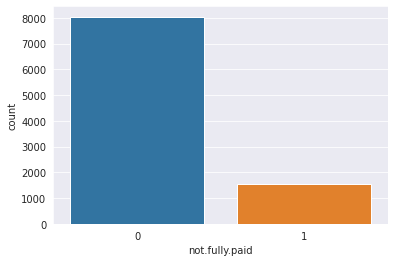

In [7]:
sns.set_style('darkgrid')
sns.countplot(x='not.fully.paid', data=df)

Random over-sampling:
1    8045
0    8045
Name: not.fully.paid, dtype: int64


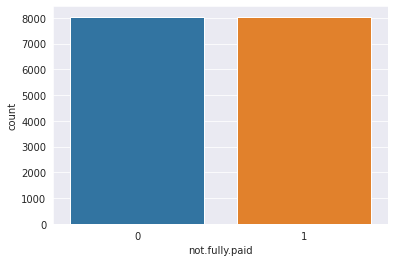

In [8]:
count_class_0, count_class_1 = df['not.fully.paid'].value_counts()
df_0 = df[df['not.fully.paid'] == 0]
df_1 = df[df['not.fully.paid'] == 1]
df_1_over = df_1.sample(count_class_0, replace=True)
df_test_over = pd.concat([df_0, df_1_over], axis=0)
print('Random over-sampling:')
print(df_test_over['not.fully.paid'].value_counts())

sns.set_style('darkgrid')
sns.countplot(x='not.fully.paid', data=df_test_over)

**2. Exploratory data analysis of different factors of the dataset**

Text(0.5, 0, 'FICO')

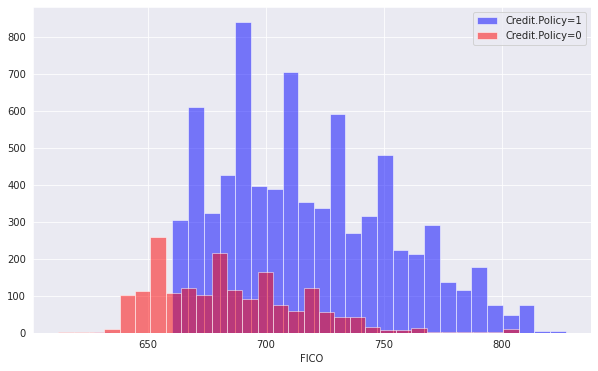

In [9]:
plt.figure(figsize=(10,6))
df[df['credit.policy']==1]['fico'].hist(alpha=0.5,color='blue',bins=30,label='Credit.Policy=1')
df[df['credit.policy']==0]['fico'].hist(alpha=0.5,color='red',bins=30,label='Credit.Policy=0')
plt.legend()
plt.xlabel('FICO')

Text(0.5, 0, 'FICO')

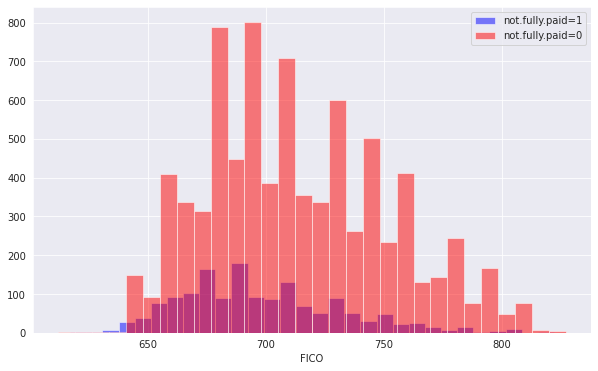

In [10]:
plt.figure(figsize=(10,6))
df[df['not.fully.paid']==1]['fico'].hist(alpha=0.5,color='blue',bins=30,label='not.fully.paid=1')
df[df['not.fully.paid']==0]['fico'].hist(alpha=0.5,color='red',bins=30,label='not.fully.paid=0')
plt.legend()
plt.xlabel('FICO')

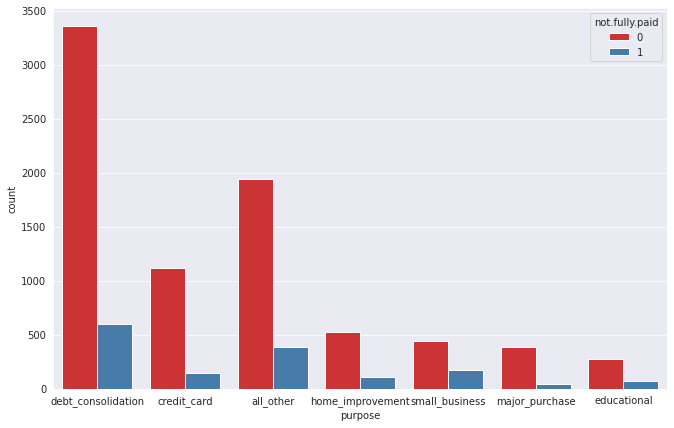

In [11]:
plt.figure(figsize=(11,7))
sns.countplot(x='purpose',hue='not.fully.paid',data=df,palette='Set1')

**3. Additional Feature Engineering**

 

*   You will check the correlation between features and will drop those features which have a strong correlation
*   This will help reduce the number of features and will leave you with the most relevant features





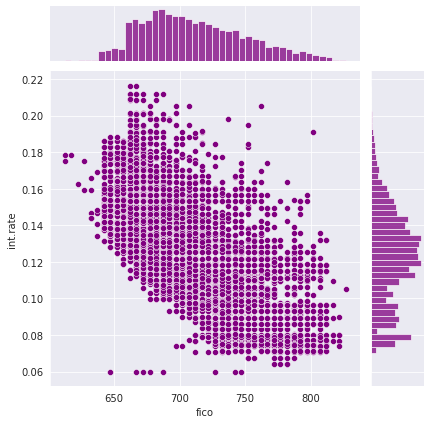

In [12]:
sns.jointplot(x='fico',y='int.rate',data=df,color='purple')

<Figure size 792x504 with 0 Axes>

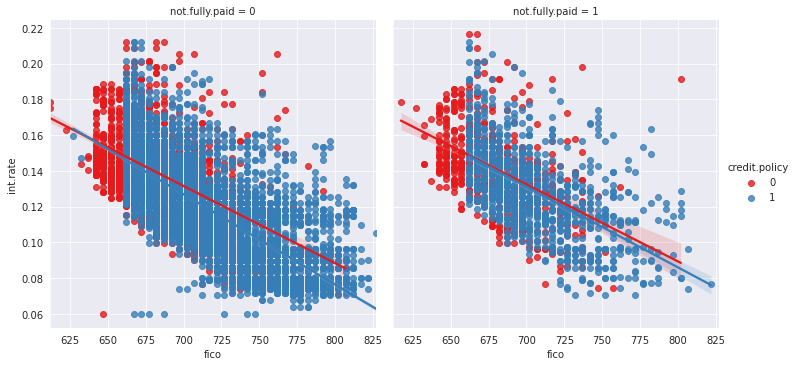

In [13]:
plt.figure(figsize=(11,7))
sns.lmplot(y='int.rate',x='fico',data=df,hue='credit.policy',
           col='not.fully.paid',palette='Set1')

In [14]:
col_fea = ['purpose']
final_data = pd.get_dummies(df_test_over,columns=col_fea,drop_first=True)
final_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16090 entries, 0 to 2532
Data columns (total 19 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   credit.policy               16090 non-null  int64  
 1   int.rate                    16090 non-null  float64
 2   installment                 16090 non-null  float64
 3   log.annual.inc              16090 non-null  float64
 4   dti                         16090 non-null  float64
 5   fico                        16090 non-null  int64  
 6   days.with.cr.line           16090 non-null  float64
 7   revol.bal                   16090 non-null  int64  
 8   revol.util                  16090 non-null  float64
 9   inq.last.6mths              16090 non-null  int64  
 10  delinq.2yrs                 16090 non-null  int64  
 11  pub.rec                     16090 non-null  int64  
 12  not.fully.paid              16090 non-null  int64  
 13  purpose_credit_card         1609

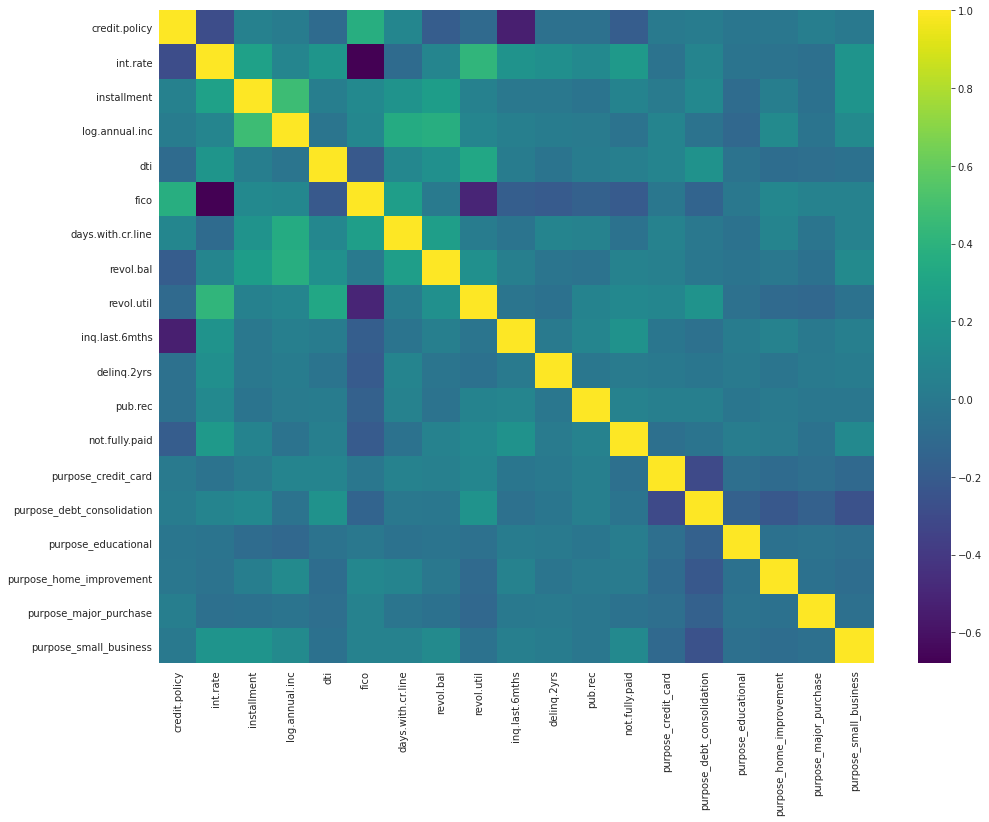

In [15]:
final_data.corr()
plt.figure(
        figsize=[16,12]
)
sns.heatmap(
        data=final_data.corr(), 
        cmap='viridis', 
        annot=False, 
        fmt='.2g'
)

**4. Modeling - Deep Learning Implementation**

In [16]:
to_train = final_data[final_data['not.fully.paid'].isin([0,1])]
to_pred = final_data[final_data['not.fully.paid'] == 2]

X = to_train.drop('not.fully.paid', axis=1).values
y = to_train['not.fully.paid'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state = 101)

scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

model = Sequential()

model.add(
        Dense(19, activation='relu')
)

model.add(
        Dense(10, activation='relu')
)

model.add(
        Dense(5, activation='relu')
)


model.add(
        Dense(1, activation='sigmoid')
)

model.compile(
        optimizer='adam', 
        loss='binary_crossentropy', 
        metrics=['accuracy']
)

early_stop = EarlyStopping(
        monitor='val_loss', 
        mode='min', 
        verbose=1, 
        patience=25
)

model.fit(
        X_train, 
        y_train, 
        epochs=200, 
        batch_size=256, 
        validation_data=(X_test, y_test),
         callbacks=[early_stop]
)

Epoch 1/200
44/44 [==============================] - 1s 7ms/step - loss: 0.6880 - accuracy: 0.5356 - val_loss: 0.6852 - val_accuracy: 0.5577
Epoch 2/200
44/44 [==============================] - 0s 3ms/step - loss: 0.6797 - accuracy: 0.5864 - val_loss: 0.6772 - val_accuracy: 0.5971
Epoch 3/200
44/44 [==============================] - 0s 2ms/step - loss: 0.6698 - accuracy: 0.6093 - val_loss: 0.6700 - val_accuracy: 0.6078
Epoch 4/200
44/44 [==============================] - 0s 2ms/step - loss: 0.6638 - accuracy: 0.6211 - val_loss: 0.6666 - val_accuracy: 0.6103
Epoch 5/200
44/44 [==============================] - 0s 3ms/step - loss: 0.6592 - accuracy: 0.6227 - val_loss: 0.6631 - val_accuracy: 0.6120
Epoch 6/200
44/44 [==============================] - 0s 4ms/step - loss: 0.6547 - accuracy: 0.6283 - val_loss: 0.6594 - val_accuracy: 0.6122
Epoch 7/200
44/44 [==============================] - 0s 3ms/step - loss: 0.6508 - accuracy: 0.6292 - val_loss: 0.6566 - val_accuracy: 0.6122
Epoch 8/200
4

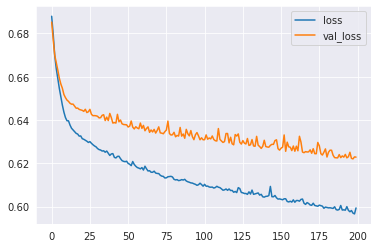

In [17]:
pd.DataFrame(model.history.history)[['loss','val_loss']].plot()

This validation result, the Loss plot, shows us the model is overfitted.

In [18]:
predictions = (model.predict(X_test) > 0.5).astype("int32")

print(
        confusion_matrix(y_test,predictions), 
        '\n', 
        classification_report(y_test,predictions)
)

[[1705  732]
 [ 973 1417]] 
               precision    recall  f1-score   support

           0       0.64      0.70      0.67      2437
           1       0.66      0.59      0.62      2390

    accuracy                           0.65      4827
   macro avg       0.65      0.65      0.65      4827
weighted avg       0.65      0.65      0.65      4827



Based on the confusion matrix, the overall f1-score for accuracy is 0.67. There are type 2 errors (973) in the prediction.

**Model refinement**

In [19]:
model_new = Sequential()

model_new.add(
        Dense(19, activation='relu')
)

model_new.add(Dropout(0.2))

model_new.add(
        Dense(10, activation='relu')
)

model_new.add(Dropout(0.2))

model_new.add(
        Dense(5, activation='relu')
)

model_new.add(Dropout(0.2))

model_new.add(
        Dense(1, activation='sigmoid')
)

model_new.compile(
        optimizer='adam', 
        loss='binary_crossentropy', 
        metrics=['binary_accuracy']
)


model_new.fit(
        X_train, 
        y_train, 
        epochs=200, 
        batch_size=256, 
        validation_data=(X_test, y_test),
         callbacks=[early_stop]
)

Epoch 1/200
44/44 [==============================] - 1s 7ms/step - loss: 0.6908 - binary_accuracy: 0.5205 - val_loss: 0.6842 - val_binary_accuracy: 0.5797
Epoch 2/200
44/44 [==============================] - 0s 3ms/step - loss: 0.6821 - binary_accuracy: 0.5467 - val_loss: 0.6746 - val_binary_accuracy: 0.6000
Epoch 3/200
44/44 [==============================] - 0s 3ms/step - loss: 0.6746 - binary_accuracy: 0.5724 - val_loss: 0.6663 - val_binary_accuracy: 0.6070
Epoch 4/200
44/44 [==============================] - 0s 3ms/step - loss: 0.6673 - binary_accuracy: 0.5878 - val_loss: 0.6620 - val_binary_accuracy: 0.6103
Epoch 5/200
44/44 [==============================] - 0s 3ms/step - loss: 0.6655 - binary_accuracy: 0.5963 - val_loss: 0.6600 - val_binary_accuracy: 0.6122
Epoch 6/200
44/44 [==============================] - 0s 3ms/step - loss: 0.6591 - binary_accuracy: 0.6012 - val_loss: 0.6580 - val_binary_accuracy: 0.6120
Epoch 7/200
44/44 [==============================] - 0s 3ms/step - los

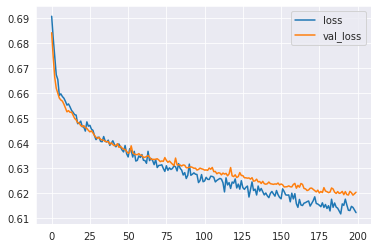

In [20]:
pd.DataFrame(model_new.history.history)[['loss','val_loss']].plot() 

The graph shows that, by adding in Dropout layers, we have reduced the overfitting issue compared with the old model.

In [21]:
predictions_new = (model_new.predict(X_test) >= 0.2).astype('int')

print(
        confusion_matrix(y_test,predictions_new), 
        '\n', 
        classification_report(y_test,predictions_new)
)

[[ 237 2200]
 [  22 2368]] 
               precision    recall  f1-score   support

           0       0.92      0.10      0.18      2437
           1       0.52      0.99      0.68      2390

    accuracy                           0.54      4827
   macro avg       0.72      0.54      0.43      4827
weighted avg       0.72      0.54      0.43      4827



By changing the cut-off line to 0.2 (default is 0.5), the Type 2 error has reduced in the prediction.